In [ ]:
#efield volumes, clinical outcomes

In [16]:
from nilearn import image
from nilearn.image import load_img
from nilearn.image import math_img
from nilearn.image import resample_to_img
import numpy as np
import nibabel as nib
import pandas as pd
import os, glob
import seaborn as sns
from matplotlib import pyplot as plt
import shutil
import scipy
from scipy.stats import pearsonr, spearmanr

In [2]:
pth = sorted(glob.glob(os.path.join('/Volumes/Cingulate/Sweetspot_Seg/Sweetspot_Seg_All_Flipped/Weighted_50-100/Efields_Masked_1.5/','*.nii')))
vols = [image.load_img(i).get_fdata() for i in pth]

In [9]:
total_vol = []
for i,v in enumerate(vols):
    total_vol.append(np.sum(v))
    
ids = []
for i in pth:
    ids.append(i[94:109])

In [14]:
df = pd.DataFrame(
    {'ID': ids,
     'Volume': total_vol
    })

df.to_csv('/Volumes/Cingulate/Sweetspot_Seg/efield_ids_vol.csv')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_17513/3165659320.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=df['ID'],y=df['Volume'],palette='rocket_r',order=df.sort_values('Volume',ascending=False).ID)


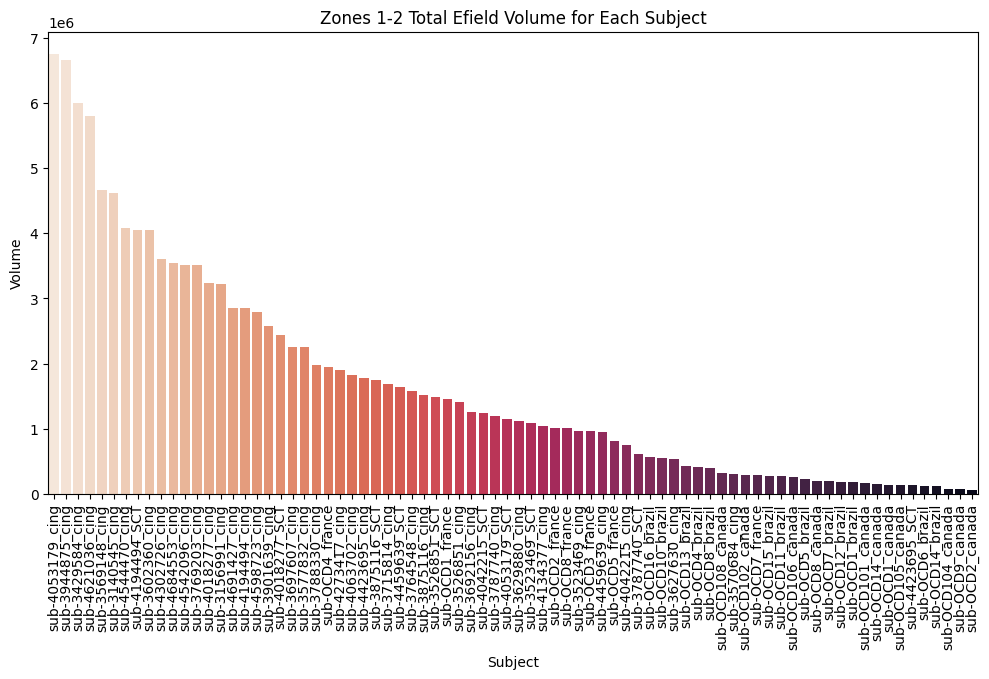

In [32]:
#bar plot of each individual subject's total volume
df = pd.read_csv('/Volumes/Cingulate/Sweetspot_Seg/efield_ids_vol.csv')
plt.figure(figsize=(12,6))
ax = sns.barplot(x=df['ID'],y=df['Volume'],palette='rocket_r',order=df.sort_values('Volume',ascending=False).ID)
ax.set(title = 'Zones 1-2 Total Efield Volume for Each Subject',xlabel='Subject', ylabel='Volume')
ax.tick_params(axis='x', rotation=90)

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_17513/544174145.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=cohort_df_sorted['ID'], x=cohort_df_sorted['Volume'], palette='rocket_r')


[Text(0, 0.5, 'Surgery Type'), Text(0.5, 0, 'Volume')]

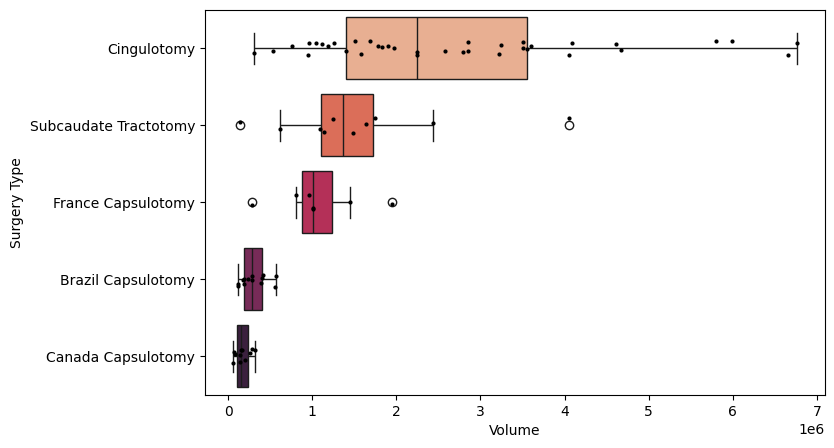

In [45]:
#total volume by surgery type
cohort_df = pd.read_csv('/Volumes/Cingulate/Sweetspot_Seg/efield_ids_vol_by_cohort.csv')
plt.figure(figsize=(8,5))
cohort_df_sorted = cohort_df.sort_values(by='Volume', ascending=False)
ax = sns.stripplot(data=cohort_df_sorted, x="Volume", y="ID", s=3, color='black')
ax = sns.boxplot(y=cohort_df_sorted['ID'], x=cohort_df_sorted['Volume'], palette='rocket_r')
ax.set(ylabel='Surgery Type', xlabel='Volume')

/var/folders/wf/8pxjw4251t7fl_l85_v1_33r0000gp/T/ipykernel_17513/555342311.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(y=dbs_lesion_df['ID'],x=dbs_lesion_df['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)


[Text(0, 0.5, 'Type of Surgery'), Text(0.5, 0, 'YBOCS Change [%]')]

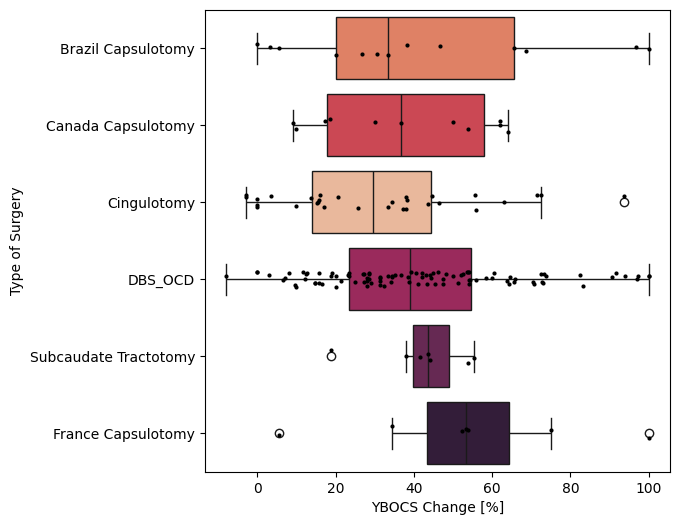

In [49]:
dbs_lesion_df = pd.read_csv('/Volumes/Cingulate/Cingulotomy/segmentations/csv_with_france/Clinical-Outcomes.csv')
medians = dbs_lesion_df.groupby('ID')['Relative_YBOCS_Change'].median().sort_values(ascending=True)
sorted_ids = medians.index.tolist()
plt.figure(figsize=(6,6))
ax = sns.stripplot(data=dbs_lesion_df, x="Relative_YBOCS_Change", y="ID", s=3,color='black')
ax = sns.boxplot(y=dbs_lesion_df['ID'],x=dbs_lesion_df['Relative_YBOCS_Change'],palette='rocket_r',order=sorted_ids)
ax.set(ylabel='Type of Surgery', xlabel='YBOCS Change [%]')

In [ ]:
#sum up efield voxels
# divide by average number of voxels in each procedure
# plot with ybocs